<a href="https://colab.research.google.com/github/Wael8787/Machine-Learning/blob/main/11_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

In [6]:
X1, Y1 = make_blobs(n_features=10, 
         n_samples=100,
         centers=4, 
         random_state=4,
         cluster_std=2)
X1.shape

(100, 10)

In [7]:
Y1.shape

(100,)

In [5]:
X1[0:10]

array([[  1.11145979,  10.62565984,   6.91705398,   7.24041203,
         -7.5048414 , -10.29490913,   0.87323018,  -6.75258413,
          2.72418018,   0.13660645],
       [  3.92221155,  -5.45790248,   6.03705918,  10.372529  ,
         -3.3836972 ,   5.83728482,  -8.16615135,  -1.31808273,
         -9.05815852,   9.95528764],
       [  8.99836679,   1.3132145 ,   8.65133356,   6.08652863,
          0.96287176,  -7.06900391,   9.28666621, -11.9650423 ,
         -4.21907678,  -4.33397795],
       [  0.07630061,   8.19919005,  -2.7169936 ,  -7.57823522,
         -7.7729307 ,  -3.54298611,   4.28522873,   3.94861454,
         -1.02829441,   3.3002391 ],
       [  8.94710622,   2.61770239,  11.02689176,   0.61456814,
          4.02967146,  -5.60635399,   7.96800925,  -9.51657347,
         -7.85142141,  -0.19179891],
       [  2.9379498 ,   8.80698611,   2.92392542,   4.66350078,
         -8.81823792,  -6.2704578 ,   1.42246317,  -8.03496111,
          5.44988453,   0.16756148],
       [  

In [8]:
Y1[0:10]

array([2, 1, 0, 3, 0, 2, 1, 2, 3, 3])

Model

In [9]:
pca = decomposition.PCA(n_components=4)

In [10]:
pc = pca.fit_transform(X1)

In [11]:
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,2
1,18.931381,0.193838,0.045462,-3.894042,1
2,-6.571463,-14.188490,-3.120115,1.278588,0
3,-7.533948,14.439427,-5.443487,3.358252,3
4,-4.591760,-11.315284,-9.130630,-1.420151,0


In [12]:
pca.explained_variance_ratio_

array([0.41594854, 0.3391866 , 0.1600729 , 0.02016822])

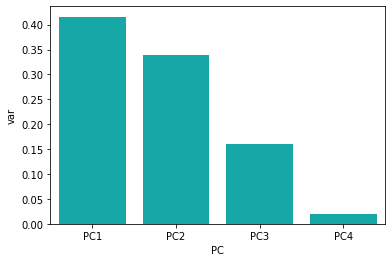

In [13]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", data=df, color="c");

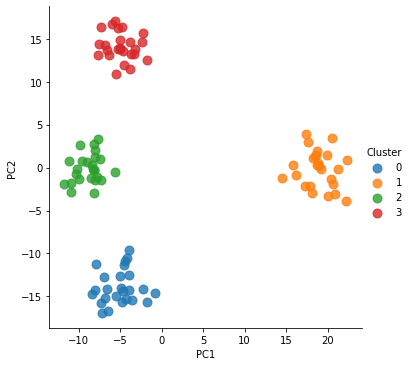

In [17]:
sns.lmplot( 
      x="PC1", 
      y="PC2",
      data=pc_df, 
      fit_reg=False, 
      hue='Cluster', # color by cluster
      legend=True,
      scatter_kws={"s": 80}
    ) # specify the point size